# 1) Library

In [1]:
import pandas as pd
import datetime as dt
pd.options.mode.chained_assignment = None  # default = 'Warn', this is to deal with SettingWithCopyWarning

# 2) Datasets

In [2]:
# Read Excel File
df = pd.ExcelFile(r'C:\Users\miows\Desktop\KPMG Virtual Internship\KPMG_VI_New_raw_data_update_final (1).xlsx')

## a) Customer Demographics 

In [3]:
# Customer Demographics Dataframe
customer_demo = pd.read_excel(df, 'CustomerDemographic')
customer_demo

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [4]:
# Customer Demographics Columns
customer_demo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [5]:
customer_demo.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [6]:
# Customer Demographics Missing Values
customer_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [7]:
# Check for duplicates in customer_id
customer_demo.customer_id.duplicated().sum()

0

In [8]:
# Unique values of gender
customer_demo['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [9]:
# Limit gender to male, female, unknown
customer_demo['gender'] = customer_demo['gender'].replace({'F': 'Female', 'Femal': 'Female', 'M': 'Male', 'U':'Unknown'})

In [10]:
# Unique values of gender
customer_demo['gender'].unique()

array(['Female', 'Male', 'Unknown'], dtype=object)

In [11]:
# Describe Past 3 Years Bike Related Purchases
customer_demo['past_3_years_bike_related_purchases'].describe()

count    4000.000000
mean       48.890000
std        28.715005
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

In [12]:
# Drop rows with missing values in DOB
customer_demo = customer_demo.dropna(subset=['DOB']) 

In [13]:
customer_demo.shape

(3913, 13)

In [14]:
# Calculate Customers' Age in 2017
last_transaction_date = dt.date(2017, 12, 31)

customer_demo['age'] = last_transaction_date.year - customer_demo['DOB'].dt.year

In [15]:
customer_demo['age'].describe()

count    3913.000000
mean       39.969333
std        12.796387
min        15.000000
25%        30.000000
50%        40.000000
75%        49.000000
max       174.000000
Name: age, dtype: float64

In [16]:
age_boxplot = customer_demo.boxplot(column= 'age')
age_boxplot

In [17]:
# Keep only customers younger than 80 years old
customer_demo = customer_demo.loc[customer_demo['age'] <= 80]

In [18]:
customer_demo.shape

(3910, 14)

In [19]:
# Unique values of Job Title
customer_demo['job_title'].nunique()

195

In [20]:
# Drop rows with missing values in Job Industry Category
customer_demo = customer_demo.dropna(subset=['job_industry_category']) 

In [21]:
customer_demo.shape

(3254, 14)

In [22]:
# Unique values of Job Industry Category
customer_demo['job_industry_category'].unique()

array(['Health', 'Financial Services', 'Property', 'IT', 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [23]:
# Unique values of Wealth Segment
customer_demo['wealth_segment'].unique()

array(['Mass Customer', 'High Net Worth', 'Affluent Customer'],
      dtype=object)

In [24]:
# Unique values of Deceased Indicator
customer_demo['deceased_indicator'].unique()

array(['N', 'Y'], dtype=object)

In [25]:
# Remove deceased customers
customer_demo = customer_demo.loc[customer_demo['deceased_indicator'] == 'N']

In [26]:
customer_demo.shape

(3252, 14)

In [27]:
# Drop default column
customer_demo.drop('default', axis = 1, inplace = True)

In [28]:
customer_demo.shape

(3252, 13)

In [29]:
# Unique values of owns_car
customer_demo['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
# Remove rows with missing values in tenure
customer_demo = customer_demo.dropna(subset=['tenure']) 

In [31]:
customer_demo.shape

(3252, 13)

In [32]:
# Unique values of tenure
customer_demo['tenure'].nunique()

22

In [33]:
import numpy as np
# Convert tenure's values to integer
customer_demo['tenure'] = customer_demo['tenure'].apply(np.int64)

In [34]:
# Unique values of tenure
customer_demo['tenure'].unique()

array([11, 16, 15,  7, 13,  8, 20,  9,  6,  1, 21, 12, 19, 14,  4, 22, 18,
        5, 17,  2, 10,  3], dtype=int64)

In [35]:
type(customer_demo['tenure'][1])

numpy.int64

In [36]:
# Distribution of tenure
customer_demo['tenure'].describe()

count    3252.000000
mean       10.725092
std         5.688095
min         1.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        22.000000
Name: tenure, dtype: float64

In [37]:
customer_demo.shape

(3252, 13)

## b) Customer Address

In [38]:
customer_address = pd.read_excel(df, 'CustomerAddress')
customer_address

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [39]:
# Check for missing values in Customer Address
customer_address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [40]:
# Check for duplicates customer ids
customer_address.customer_id.duplicated().sum()

0

In [41]:
# Unique values of postcode
customer_address['postcode'].nunique()

873

In [42]:
# Describe postcodes
customer_address['postcode'].describe()

count    3999.000000
mean     2985.755939
std       844.878364
min      2000.000000
25%      2200.000000
50%      2768.000000
75%      3750.000000
max      4883.000000
Name: postcode, dtype: float64

In [43]:
# unique values of state
customer_address['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [44]:
# Limit state to NSW, QLD, VIC
customer_address['state'] = customer_address['state'].replace({'New South Wales': 'NSW', 'Victoria': 'VIC'})

In [45]:
# unique values of state
customer_address['state'].unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

In [46]:
# unique values of country
customer_address['country'].unique()

array(['Australia'], dtype=object)

In [47]:
# Unique values of property valuation
customer_address['property_valuation'].unique()

array([10,  9,  4, 12,  8,  6,  7,  3,  5, 11,  1,  2], dtype=int64)

In [48]:
# Describe property valuation
customer_address['property_valuation'].describe()

count    3999.000000
mean        7.514379
std         2.824663
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: property_valuation, dtype: float64

# c) Transactions

In [49]:
transactions = pd.read_excel(df, 'Transactions')
transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [50]:
# Check for missing values in Transactions
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [51]:
# check duplicates of transaction_id
transactions.transaction_id.duplicated().sum()

0

In [52]:
# Number of products
transactions['product_id'].nunique()

101

In [53]:
# check duplicates of customer_id (> 1 transaction by customer)
transactions.customer_id.duplicated().sum()

16506

In [54]:
# Describe Transaction Date
transactions['transaction_date'].describe()

count                   20000
unique                    364
top       2017-02-14 00:00:00
freq                       82
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [55]:
# unique values of online_order
transactions['online_order'].unique()

array([ 0.,  1., nan])

In [56]:
# Value counts of online_order
transactions['online_order'].value_counts(ascending = False)

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [57]:
# Fill missing values of online_order
transactions['online_order'].fillna(value = 1.0, inplace=True)

In [58]:
# unique values of online_order
transactions['online_order'].unique()

array([0., 1.])

In [59]:
# unique values of online_status
transactions['order_status'].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [60]:
# Remove rows with missing values for brand
transactions = transactions.dropna(subset=['brand']) 

In [61]:
# Check for missing values in Transactions
transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [62]:
transactions.shape

(19803, 13)

In [63]:
# unique values of brand
transactions['brand'].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B'], dtype=object)

In [64]:
# unique values of product_line
transactions['product_line'].unique()

array(['Standard', 'Road', 'Mountain', 'Touring'], dtype=object)

In [65]:
# unique values of product_class
transactions['product_class'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [66]:
# unique values of product_size
transactions['product_size'].unique()

array(['medium', 'large', 'small'], dtype=object)

In [67]:
# Create new column Profit
#transactions['profit'] = transactions['list_price'] - transactions['standard_cost']
#transactions['profit'] = transactions['profit'].round(2)

In [68]:
# Describe profit
#transactions['profit'].describe()

In [69]:
# Create Boxplot for Profit
#transactions_boxplot = transactions.boxplot(column = 'profit')
#transactions_boxplot

In [70]:
#transactions['profit'].value_counts(ascending= False)

In [71]:
#transactions.shape

In [72]:
# Drop product_first_sold_date column
transactions.drop('product_first_sold_date', axis = 1, inplace = True)

In [73]:
transactions.shape

(19803, 12)

# Join the three given datasets 

In [74]:
# Merge Transactions + Customer Demographics 
joined_dataframe = pd.merge(transactions, customer_demo, how='inner')
joined_dataframe.shape

(16133, 24)

In [75]:
# Sprocket did not have data of these customers
19803 - 16133

3670

In [76]:
# Final Merged Dataframe (Transactions, Customer Demographics, Customer Address)
joined_dataframe = pd.merge(joined_dataframe, customer_address, how='inner')
joined_dataframe.shape

(16112, 29)

In [77]:
# Only one customer in Sprocket's database did not provide address.

In [78]:
joined_dataframe.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,Yes,10,62,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,N,Yes,10,62,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,Yes,10,62,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,N,Yes,10,38,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Mass Customer,N,Yes,10,38,4 Shopko Circle,2196,NSW,Australia,5


### RFM Analysis

In [79]:
# Create RECENCY Column ( Days since the last transaction)
joined_dataframe['recency'] = max(joined_dataframe['transaction_date']) - (joined_dataframe['transaction_date'])

# Convert Recency's values to integer
joined_dataframe['recency']= pd.to_numeric(joined_dataframe['recency'].dt.days, downcast='integer')

In [80]:
# Create FREQUENCY column (total transactions by each customer)
joined_dataframe['frequency'] = joined_dataframe['customer_id'].map(joined_dataframe['customer_id'].value_counts())

In [81]:
# Create MONETARY column (total amount spent by each customer)
joined_dataframe['monetary']= joined_dataframe['list_price'].groupby(joined_dataframe['customer_id']).transform('sum')

In [82]:
# Create R SCORE column
joined_dataframe['r_score'] = pd.qcut(joined_dataframe['recency'], 3, labels = ["3", "2", "1"])

# Convert R Score's values to integer
joined_dataframe['r_score'] = pd.to_numeric(joined_dataframe['r_score'])

In [83]:
# Create F SCORE column
joined_dataframe['f_score'] = pd.qcut(joined_dataframe['frequency'], 3, labels = ["1", "2", "3"])

# Convert F Score's values to integer
joined_dataframe['f_score'] = pd.to_numeric(joined_dataframe['f_score'])

In [84]:
# Create M SCORE column
joined_dataframe['m_score'] = pd.qcut(joined_dataframe['monetary'], 3, labels = ["1", "2", "3"])

# Convert M Score's values to integer
joined_dataframe['m_score'] = pd.to_numeric(joined_dataframe['m_score'])

In [85]:
# Create RFM score column 
joined_dataframe['RFM_score'] = 100 * joined_dataframe['r_score'] + 10 * joined_dataframe['f_score'] +  joined_dataframe['m_score'] 

In [86]:
joined_dataframe['customer_rating'] = pd.qcut(joined_dataframe['RFM_score'], 5, labels = ["1", "2", "3","4","5"])

# Convert Customer Rating's values to integer
joined_dataframe['customer_rating'] = pd.to_numeric(joined_dataframe['customer_rating'])

In [87]:
joined_dataframe.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,country,property_valuation,recency,frequency,monetary,r_score,f_score,m_score,RFM_score,customer_rating
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Australia,6,308,3,1953.15,1,1,1,111,1
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Australia,6,75,3,1953.15,3,1,1,311,4
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Australia,6,248,3,1953.15,1,1,1,111,1
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Australia,5,223,7,7351.70,2,2,2,222,3
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Australia,5,86,7,7351.70,3,2,2,322,5


In [88]:
joined_dataframe['customer_rating'].value_counts()

3    3956
2    3524
1    3224
5    3204
4    2204
Name: customer_rating, dtype: int64

In [89]:
joined_dataframe.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'recency', 'frequency', 'monetary', 'r_score',
       'f_score', 'm_score', 'RFM_score', 'customer_rating'],
      dtype='object')

In [90]:
joined_dataframe_csv = joined_dataframe.to_csv("joined_dataframe.csv", index = False)

### Prepare train set for modelling

In [91]:
# Remove irrelevant columns for modelling 
joined_dataframe.drop(['first_name', 'last_name','DOB', 'job_title', 'deceased_indicator', 'address', 'postcode','transaction_id', 'product_id', 'customer_id', 
                       'transaction_date','online_order', 'order_status', 'brand', 'product_line','product_class', 
                       'product_size', 'list_price', 'standard_cost', 'country','recency', 'frequency', 'monetary', 'r_score',
       'f_score', 'm_score', 'RFM_score'], axis=1, inplace = True)

In [92]:
joined_dataframe.columns

Index(['gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'state', 'property_valuation', 'customer_rating'],
      dtype='object')

In [93]:
joined_dataframe.shape

(16112, 10)

In [94]:
train_set = joined_dataframe

In [95]:
# CATEGORISE CONTINUOUS VARIABLES

# 1. 'past_3_years_bike_related_purchases'

train_set['past_3_years_bike_related_purchases'] = pd.qcut(train_set['past_3_years_bike_related_purchases'], 4, labels = ["1", "2", "3", "4"])

# Convert Past 3 Years Bike Related Purchases's values to integer
train_set['past_3_years_bike_related_purchases'] = pd.to_numeric(train_set['past_3_years_bike_related_purchases'])


# 2. 'age'

train_set['age'] = pd.qcut(train_set['age'], 4, labels = ["1", "2", "3", "4"])

# Convert Age's values to integer
train_set['age'] = pd.to_numeric(train_set['age'])


In [96]:
# drop 'customer_rating' and assign to Y_train
Y_train = train_set['customer_rating']
train_set.drop('customer_rating', axis=1, inplace = True)
X_train = train_set

print(Y_train.shape)
print(X_train.shape)

(16112,)
(16112, 9)


In [97]:
# NOMINAL/ CATEGORICAL DATA 

#'gender', nominal
#'past_3_years_bike_related_purchases', ordinal
#'job_industry_category' nominal
#'wealth_segment', nominal
#'owns_car', nominal
#'tenure', ordinal
#'age' ordinal
#'state', nominal
#'property_valuation', ordinal
#'customer_rating' label encoder

In [98]:
X_train.columns

Index(['gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'state', 'property_valuation'],
      dtype='object')

In [99]:
# ONE HOT ENCODING (NOMINAL DATA)

nominal_columns = ['gender', 'job_industry_category', 'wealth_segment','owns_car','state']

# pd.get_dummies(df, prefix=['col1', 'col2'])
X_train = pd.get_dummies(X_train, prefix = nominal_columns)

In [100]:
X_train.head()

,past_3_years_bike_related_purchases,tenure,age,property_valuation,gender_Female,gender_Male,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,...,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,state_NSW,state_QLD,state_VIC
0,1,10,4,6,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
1,1,10,4,6,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
2,1,10,4,6,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
3,4,10,2,5,1,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
4,4,10,2,5,1,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0


In [101]:
################################################################################################################################

In [102]:
# ORDINAL ENCODING (ORDINAL DATA)
from sklearn.preprocessing import OrdinalEncoder

ordinal_categories = [['1', '2', '3', '4'], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                                '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'],['1', '2', '3', '4'],
                                  ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']]

ordinal_columns = ['past_3_years_bike_related_purchases', 'tenure', 'age', 'property_valuation']

# define ordinal encoding
ordinal_encoder = OrdinalEncoder(categories = ordinal_categories)

# transfrom data
ordinal_X_train = ordinal_encoder.fit_transform(X_train[ordinal_columns])

In [103]:
# Show transformed ordinal columns
ordinal_X_train_dataframe = pd.DataFrame(ordinal_X_train)
ordinal_X_train_dataframe.head()

,0,1,2,3
0,0.0,9.0,3.0,5.0
1,0.0,9.0,3.0,5.0
2,0.0,9.0,3.0,5.0
3,3.0,9.0,1.0,4.0
4,3.0,9.0,1.0,4.0


In [104]:
# Rename Ordinal X train Columns 
ordinal_X_train_dataframe.rename(columns = {0:'past_3_years_bike_related_purchases', 1:'tenure', 2:'age', 3: 'property_valuation'}, inplace = True)

In [105]:
ordinal_X_train_dataframe.head()

,past_3_years_bike_related_purchases,tenure,age,property_valuation
0,0.0,9.0,3.0,5.0
1,0.0,9.0,3.0,5.0
2,0.0,9.0,3.0,5.0
3,3.0,9.0,1.0,4.0
4,3.0,9.0,1.0,4.0


In [106]:
# Replace ordinal columns in X_train with transformed ordinal columns 

for i in range(len(ordinal_columns)):
    X_train[ordinal_columns[i]] = ordinal_X_train_dataframe[ordinal_columns[i]]

In [107]:
X_train.head()

,past_3_years_bike_related_purchases,tenure,age,property_valuation,gender_Female,gender_Male,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,...,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,state_NSW,state_QLD,state_VIC
0,0.0,9.0,3.0,5.0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
1,0.0,9.0,3.0,5.0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
2,0.0,9.0,3.0,5.0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
3,3.0,9.0,1.0,4.0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
4,3.0,9.0,1.0,4.0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0


In [108]:
X_train.isnull().sum()

past_3_years_bike_related_purchases         0
tenure                                      0
age                                         0
property_valuation                          0
gender_Female                               0
gender_Male                                 0
job_industry_category_Argiculture           0
job_industry_category_Entertainment         0
job_industry_category_Financial Services    0
job_industry_category_Health                0
job_industry_category_IT                    0
job_industry_category_Manufacturing         0
job_industry_category_Property              0
job_industry_category_Retail                0
job_industry_category_Telecommunications    0
wealth_segment_Affluent Customer            0
wealth_segment_High Net Worth               0
wealth_segment_Mass Customer                0
owns_car_No                                 0
owns_car_Yes                                0
state_NSW                                   0
state_QLD                         

In [109]:
# COLUMN TRANSFORMER - to handle ordinal in X_train

#from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
#from sklearn.compose import make_column_transformer

#ordinal_columns = ['past_3_years_bike_related_purchases', 'tenure', 'age', 'property_valuation']

# define ordinal encoding
#oe = OrdinalEncoder(categories = [['1', '2', '3', '4'], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                                #'13', '14', '15', '16', '17', '18', '19', '20', '21', '22'],['1', '2', '3', '4'],
                                  #['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']])

#columntransformer = make_column_transformer((oe, ['past_3_years_bike_related_purchases', 'tenure', 'age', 'property_valuation']),
                                           #remainder = 'passthrough')

#columntransformer.fit_transform(X_train)

In [110]:
################################################################################################################################

In [111]:
# LABELENCODER - for target value (Y_train)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

In [112]:
# Mapping by Label Encoder
name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
name_mapping

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4}

In [113]:
Y_train

array([0, 3, 0, ..., 2, 3, 3], dtype=int64)

### MODELLING (Logistic Regression) 

In [114]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score

#lr_model= joined_dataframe

In [115]:
# split data into X_train and Y_train
#X_train = lr_model.drop(['customer_rating'], axis=1)
#Y_train = lr_model['customer_rating']

In [116]:
# Naive Bayes
#from sklearn.naive_bayes import MultinomialNB

In [117]:
# SVM 
#import numpy as np
#from random import sample
#from sklearn.svm import SVC
#from sklearn import metrics
#from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler

### 10-fold Cross Validation

In [118]:
mlr = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 1000)
cv_scores = cross_val_score(mlr, X_train, Y_train, cv = 10, scoring ='accuracy')
print(cv_scores.mean())

0.2347935949035246


In [119]:
# Naive Bayes

#mnb = MultinomialNB()
#scores = cross_val_score(mnb, X_train, Y_train, cv = 10, scoring ='accuracy')
#print(scores.mean())

In [120]:
# SVM

# Normalisation
#normalized_X = preprocessing.normalize(X_train.values)
#X_train = pd.DataFrame(normalized_X, index=X_train.index, columns=X_train.columns)

# Standardization
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)

# Train test split
#X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_train, Y_train, 
                                                                    #test_size=0.3, random_state=1234)

In [121]:
# Fit SVM model
#SVM_model = SVC(kernel="linear", C=0.1, gamma=1)
#clf = SVM_model.fit(X_train_SVM, y_train_SVM)

In [122]:
# Check overfitting of the model
# Predicting over the Train Set
#train_pred_SVM = clf.predict(X_train_SVM)
#train_score = clf.score(X_train_SVM, y_train_SVM)
#print('Training Score', train_score)

# Predicting over the Test Set
#test_predict = clf.predict(X_train)
#test_score = clf.score(X_test_SVM, y_test_SVM)
#print('Test score', test_score )
#pd.Series(train_pred_SVM).unique()

## d) New Customers

In [123]:
new_customers = pd.read_excel(df, 'NewCustomerList')

In [124]:
new_customers.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [125]:
# Create Age column 
last_transaction_date = dt.date(2017, 12, 31)

new_customers['age'] = last_transaction_date.year - new_customers['DOB'].dt.year

In [126]:
# Remove Irrelevant Columns

new_customers.drop(['first_name', 'last_name','DOB', 'job_title', 'deceased_indicator','address', 'postcode', 
                    'country', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
                    'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'], axis=1, inplace = True)

new_customers.shape

(1000, 9)

In [127]:
new_customers.columns

Index(['gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'state', 'property_valuation', 'age'],
      dtype='object')

In [128]:
# New Customers Missing Values
new_customers.isnull().sum()

gender                                   0
past_3_years_bike_related_purchases      0
job_industry_category                  165
wealth_segment                           0
owns_car                                 0
tenure                                   0
state                                    0
property_valuation                       0
age                                     17
dtype: int64

In [129]:
# Unique values of gender
new_customers['gender'].unique()

array(['Male', 'Female', 'U'], dtype=object)

In [130]:
# Replace 'U' in gender with 'Unknown'
new_customers['gender'] = new_customers['gender'].replace({'U':'Unknown'})

In [131]:
# Unique values of gender
new_customers['gender'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [132]:
# Describe Past 3 Years Bike Related Purchases
new_customers['past_3_years_bike_related_purchases'].describe()

count    1000.000000
mean       49.836000
std        27.796686
min         0.000000
25%        26.750000
50%        51.000000
75%        72.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

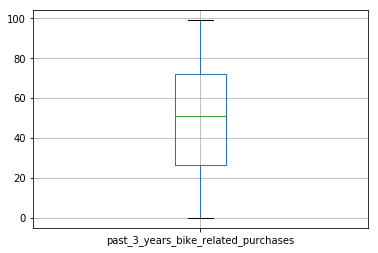

In [133]:
# Past_3_years_bike_related_purchases_boxplot
past_3_years_bike_related_purchases_boxplot = new_customers.boxplot(column= 'past_3_years_bike_related_purchases')
past_3_years_bike_related_purchases_boxplot

In [134]:
# Drop rows with missing values in Job Industry Category
new_customers = new_customers.dropna(subset=['job_industry_category']) 

In [135]:
new_customers.shape

(835, 9)

In [136]:
# New Customers Missing Values
new_customers.isnull().sum()

gender                                  0
past_3_years_bike_related_purchases     0
job_industry_category                   0
wealth_segment                          0
owns_car                                0
tenure                                  0
state                                   0
property_valuation                      0
age                                    17
dtype: int64

In [137]:
# Unique values of Job Industry Category
new_customers['job_industry_category'].unique()

array(['Manufacturing', 'Property', 'Financial Services', 'Entertainment',
       'Retail', 'IT', 'Telecommunications', 'Health', 'Argiculture'],
      dtype=object)

In [138]:
# Unique values of Job Industry Category
new_customers['job_industry_category'].nunique()

9

In [139]:
# Unique values of Wealth Segment
new_customers['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [140]:
# Unique values of owns_car
new_customers['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [141]:
# Unique values of tenure
new_customers['tenure'].unique()

array([14, 16, 10,  5, 19, 22,  8, 17,  3,  9,  4, 11, 12, 13,  7, 20, 15,
        6, 18, 21,  2,  1,  0], dtype=int64)

In [142]:
# unique values of state
new_customers['state'].unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

In [143]:
# Unique values of property valuation
new_customers['property_valuation'].unique()

array([ 6, 11,  5,  1,  9,  7, 10,  8,  4,  2, 12,  3], dtype=int64)

In [144]:
# Drop rows with missing values in Age
new_customers = new_customers.dropna(subset=['age']) 

In [145]:
new_customers.shape

(818, 9)

In [146]:
# Describe age distribution
new_customers['age'].describe()

count    818.000000
mean      45.887531
std       16.905948
min       15.000000
25%       34.000000
50%       45.000000
75%       60.000000
max       79.000000
Name: age, dtype: float64

In [147]:
# CATEGORISE CONTINUOUS VARIABLES

# 1. 'past_3_years_bike_related_purchases'

new_customers['past_3_years_bike_related_purchases'] = pd.qcut(new_customers['past_3_years_bike_related_purchases'], 4, labels = ["1", "2", "3", "4"])

# Convert Past 3 Years Bike Related Purchases's values to integer
new_customers['past_3_years_bike_related_purchases'] = pd.to_numeric(new_customers['past_3_years_bike_related_purchases'])


# 2. 'age'

new_customers['age'] = pd.qcut(new_customers['age'], 4, labels = ["1", "2", "3", "4"])

# Convert Age's values to integer
new_customers['age'] = pd.to_numeric(new_customers['age'])


In [148]:
new_customers.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age
0,Male,4,Manufacturing,Mass Customer,Yes,14,QLD,6,3
1,Male,3,Property,Mass Customer,No,16,NSW,11,3
2,Female,1,Financial Services,Affluent Customer,No,10,VIC,5,2
3,Female,3,Manufacturing,Affluent Customer,Yes,5,QLD,1,2
4,Female,2,Financial Services,Affluent Customer,No,19,NSW,9,3


In [149]:
# ONE HOT ENCODING (NOMINAL DATA)

nominal_columns = ['gender', 'job_industry_category', 'wealth_segment','owns_car','state']

X_test = new_customers

# pd.get_dummies(df, prefix=['col1', 'col2'])
X_test = pd.get_dummies(X_test, prefix = nominal_columns)

In [150]:
X_test.head()

,past_3_years_bike_related_purchases,tenure,property_valuation,age,gender_Female,gender_Male,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,...,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,state_NSW,state_QLD,state_VIC
0,4,14,6,3,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,3,16,11,3,0,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
2,1,10,5,2,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,3,5,1,2,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,2,19,9,3,1,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0


In [151]:
# ORDINAL ENCODING (ORDINAL DATA)
from sklearn.preprocessing import OrdinalEncoder

ordinal_categories = [['1', '2', '3', '4'], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                                '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'],['1', '2', '3', '4'],
                                  ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']]

ordinal_columns = ['past_3_years_bike_related_purchases', 'tenure', 'age', 'property_valuation']

# define ordinal encoding
ordinal_encoder = OrdinalEncoder(categories = ordinal_categories)

# transfrom data
ordinal_X_test = ordinal_encoder.fit_transform(X_test[ordinal_columns])

In [152]:
# Show transformed ordinal columns

ordinal_X_test_dataframe = pd.DataFrame(ordinal_X_test)
ordinal_X_test_dataframe.head()

,0,1,2,3
0,3.0,13.0,2.0,5.0
1,2.0,15.0,2.0,10.0
2,0.0,9.0,1.0,4.0
3,2.0,4.0,1.0,0.0
4,1.0,18.0,2.0,8.0


In [153]:
# Rename Ordinal X test Columns 
ordinal_X_test_dataframe.rename(columns = {0:'past_3_years_bike_related_purchases', 1:'tenure', 2:'age', 3: 'property_valuation'}, inplace = True)

In [154]:
ordinal_X_test_dataframe.isnull().sum()

past_3_years_bike_related_purchases    0
tenure                                 0
age                                    0
property_valuation                     0
dtype: int64

In [155]:
ordinal_X_test_dataframe['past_3_years_bike_related_purchases'].isnull().sum()

0

In [156]:
# Replace ordinal columns in X_test with transformed ordinal columns 


for i in range(len(ordinal_columns)):
               X_test[ordinal_columns[i]] = ordinal_X_test_dataframe[ordinal_columns[i]].values

In [157]:
X_test.isnull().sum()

past_3_years_bike_related_purchases         0
tenure                                      0
property_valuation                          0
age                                         0
gender_Female                               0
gender_Male                                 0
job_industry_category_Argiculture           0
job_industry_category_Entertainment         0
job_industry_category_Financial Services    0
job_industry_category_Health                0
job_industry_category_IT                    0
job_industry_category_Manufacturing         0
job_industry_category_Property              0
job_industry_category_Retail                0
job_industry_category_Telecommunications    0
wealth_segment_Affluent Customer            0
wealth_segment_High Net Worth               0
wealth_segment_Mass Customer                0
owns_car_No                                 0
owns_car_Yes                                0
state_NSW                                   0
state_QLD                         

In [158]:
import numpy as np 

# Predict Customer Rating of new customers

mlr_classifier = mlr.fit(X_train, Y_train)
mlr_prediction = mlr_classifier.predict(X_test)

# Store predictions in .csv
result = pd.DataFrame(np.arange(1,len(mlr_prediction) +1), columns = ['Instance_id'])
result['predicted_rating'] = mlr_prediction

result.to_csv("MulticlassLR_prediction.csv", index = False)

In [159]:
prediction_dataframe = pd.read_csv('MulticlassLR_prediction.csv')

In [160]:
prediction_dataframe.head()

,Instance_id,predicted_rating
0,1,2
1,2,2
2,3,2
3,4,2
4,5,2


In [161]:
prediction_dataframe.shape

(818, 2)

In [162]:
prediction_dataframe['predicted_rating'].unique()

array([2, 1, 4], dtype=int64)

In [163]:
# Join prediction with new customers dataframe
prediction_column = prediction_dataframe['predicted_rating']
new_customers_with_ratings = new_customers.join(prediction_column)

In [164]:
new_customers_with_ratings.shape

(818, 10)

In [165]:
# Dataframe for high value customers
targeted_customers = new_customers_with_ratings.loc[new_customers_with_ratings['predicted_rating'] == 4]
targeted_customers.shape

(41, 10)

In [166]:
targeted_customers.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age,predicted_rating
8,Male,2,Manufacturing,Mass Customer,Yes,5,NSW,10,2,4.0
12,Male,3,Telecommunications,Mass Customer,No,9,NSW,11,1,4.0
21,Male,2,Financial Services,Mass Customer,Yes,8,NSW,7,1,4.0
29,Female,2,Health,High Net Worth,No,8,VIC,10,3,4.0
97,Male,3,Retail,Mass Customer,No,11,QLD,6,1,4.0
